In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('C:/Users/swech/Desktop/TheBlackPearls-Internship/DataAnalysis-Python/sales_data_sample.csv', encoding='latin1')

In [11]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             5

In [12]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.0000

In [26]:
#Filtering the data

large_deals = df[df['DEALSIZE'] == 'Large']
print(large_deals.head())
print("--------------------------------------------------------------------------------------------------------------------")
high_sales = df[df['SALES'] > 5000]
print("High Sales:\n", high_sales.head())
print("--------------------------------------------------------------------------------------------------------------------")
usa_orders = df[df['COUNTRY'] == 'USA']
print("USA Orders:\n", usa_orders.head())

    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
20        10341               41      100.0                9  7737.93   
25        10417               66      100.0                2  7516.08   
27        10112               29      100.0                1  7209.11   
28        10126               38      100.0               11  7329.06   
29        10140               37      100.0               11  7374.10   

          ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
20  11/24/2004 0:00   Shipped       4        11     2004  ...   
25   5/13/2005 0:00  Disputed       2         5     2005  ...   
27   3/24/2003 0:00   Shipped       1         3     2003  ...   
28   5/28/2003 0:00   Shipped       2         5     2003  ...   
29   7/24/2003 0:00   Shipped       3         7     2003  ...   

          ADDRESSLINE1  ADDRESSLINE2        CITY STATE POSTALCODE  COUNTRY  \
20         Geislweg 14           NaN    Salzburg   NaN       5020  Austria   
25  C/ Moralza

In [25]:
#Sorting the Data

sorted_sales = df.sort_values(by='SALES', ascending=False)
print(sorted_sales.head())
print("--------------------------------------------------------------------------------------------------------------------")
sorted_by_orderdate = df.sort_values(by='ORDERDATE')
print("Sorted by Order Date:\n", sorted_by_orderdate.head())

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
598         10407               76      100.0                2  14082.8   
744         10322               50      100.0                6  12536.5   
53          10424               50      100.0                6  12001.0   
1062        10412               60      100.0                9  11887.8   
104         10403               66      100.0                9  11886.6   

           ORDERDATE      STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
598   4/22/2005 0:00     On Hold       2         4     2005  ...   
744   11/4/2004 0:00     Shipped       4        11     2004  ...   
53    5/31/2005 0:00  In Process       2         5     2005  ...   
1062   5/3/2005 0:00     Shipped       2         5     2005  ...   
104    4/8/2005 0:00     Shipped       2         4     2005  ...   

                      ADDRESSLINE1  ADDRESSLINE2       CITY STATE POSTALCODE  \
598                 3086 Ingle Ln.           NaN   San Jose 

In [24]:
#Grouping the data

grouped_sales = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
print(grouped_sales)
print("---------------------------------------------------------------------------------------------------------------------")
mean_sales_by_year = df.groupby('YEAR_ID')['SALES'].mean().reset_index()
print("Mean Sales by Year:\n", mean_sales_by_year)
print('---------------------------------------------------------------------------------------------------------------------')
customer_orders = df.groupby('CUSTOMERNAME').agg({'ORDERNUMBER': 'count', 'SALES': 'sum'}).reset_index()
customer_orders.rename(columns={'ORDERNUMBER': 'Number of Orders', 'SALES': 'Total Sales'}, inplace=True)
print("Customer Orders and Sales:\n", customer_orders.head())

        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84
---------------------------------------------------------------------------------------------------------------------
Mean Sales by Year:
    YEAR_ID        SALES
0     2003  3516.979540
1     2004  3512.388550
2     2005  3747.880146
---------------------------------------------------------------------------------------------------------------------
Customer Orders and Sales:
               CUSTOMERNAME  Number of Orders  Total Sales
0           AV Stores, Co.                51    157807.81
1             Alpha Cognac                20     70488.44
2       Amica Models & Co.                26     94117.26
3  Anna's Decorations, Ltd                46    153996.13
4        Atelier graphique                 7     24179.96


In [17]:
# Mean
mean_sales = df['SALES'].mean()
print(f"Mean Sales: {mean_sales}")

# Median
median_sales = df['SALES'].median()
print(f"Median Sales: {median_sales}")

# Standard Deviation
std_sales = df['SALES'].std()
print(f"Standard Deviation of Sales: {std_sales}")

Mean Sales: 3553.889071909316
Median Sales: 3184.8
Standard Deviation of Sales: 1841.8651057401805


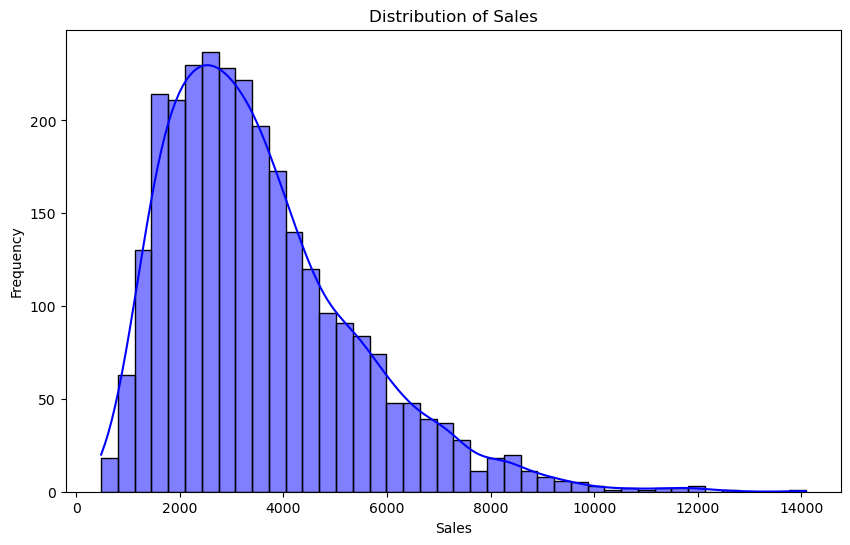

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

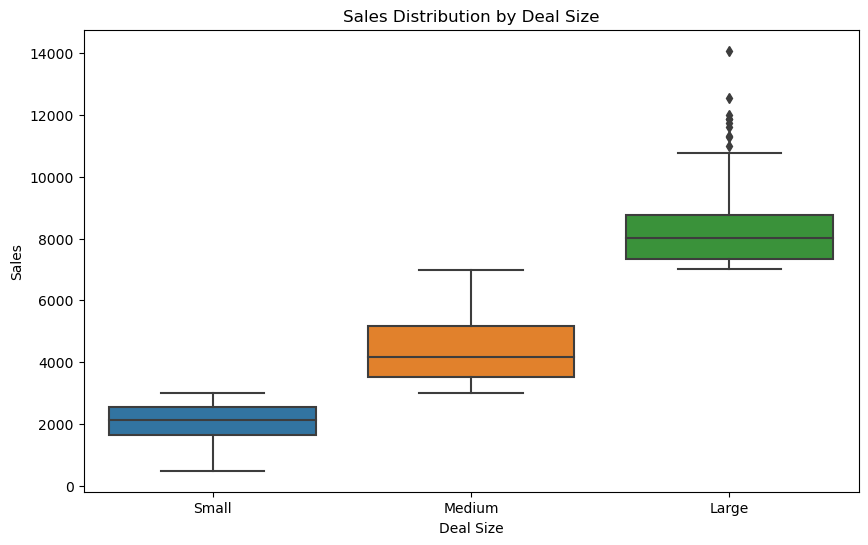

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

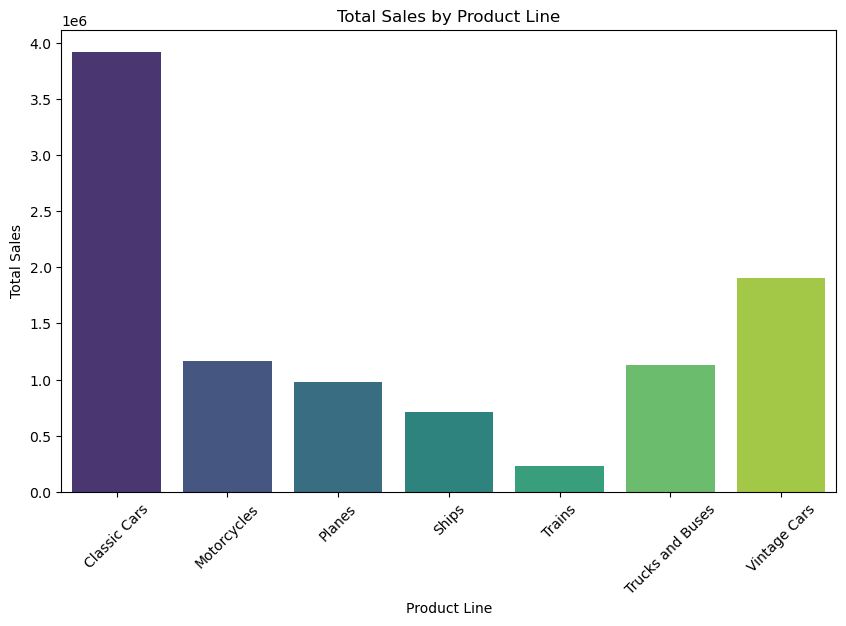

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=grouped_sales, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

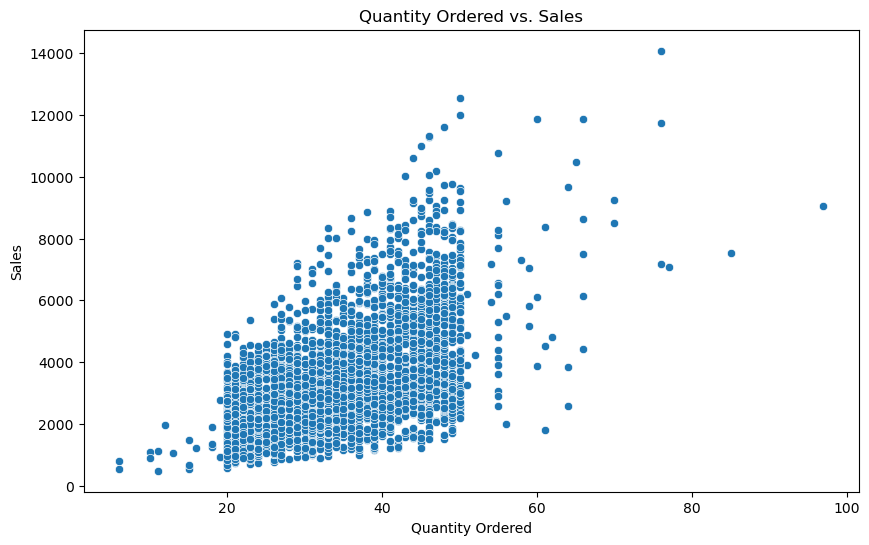

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.title('Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()